In [209]:
!pip install scikit-learn
!pip install pandas

In [210]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split


In [211]:
X,y=make_regression(n_samples=500,n_features=10,n_informative=5,noise=2,random_state=0)
print(X.shape,y.shape)

(500, 10) (500,)


In [212]:
def normalize(X):
    mean=X.mean(axis=0)
    std=X.std(axis=0)
    return (X-mean)/std

In [213]:
X=normalize(X)
pd.DataFrame(X).head()


,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [214]:
X.mean(axis=0)

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [215]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

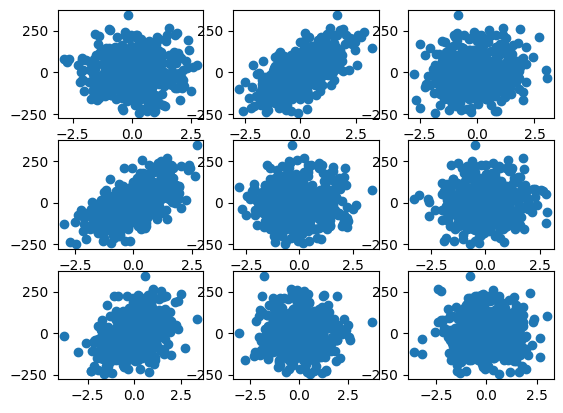

In [216]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.scatter(X[:,i],y)
plt.show()

In [217]:
XT,Xt,yT,yt=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=0)
Xt

array([[ 0.38012047, -1.60855997,  0.89423389, ...,  0.50851272,
         0.97330502,  0.14612095],
       [-0.68952785,  0.34621748,  0.81893671, ...,  0.92682376,
         0.49630266, -1.61637533],
       [-0.96240976,  0.64368384,  1.04940441, ...,  0.31382856,
         0.9051239 ,  1.32658886],
       ...,
       [-1.79018662, -0.29316457, -0.40828365, ..., -1.60833574,
        -0.13406313,  0.24532376],
       [-0.33552892, -1.05335735,  0.72304894, ..., -0.94593645,
         0.55177682,  1.68848387],
       [-0.52009392,  0.20402875,  0.9138667 , ...,  1.1502026 ,
        -1.68453025,  0.85809727]])

In [218]:
Xt.shape

(150, 10)

In [219]:
n_features=X.shape[1]

In [220]:
def preprocess(X):
    if (X.shape[1]==n_features):
        m=X.shape[0]
        ones=np.ones((m,1))
        X=np.hstack((ones,X))
    return X
X=preprocess()

In [221]:
def hypothesis(X,theta):
    return np.dot(X,theta)
def loss(X,theta,y):
    yp=hypothesis(X,theta)
    error=np.mean((yp-y)**2)
    return error
def gradient(X,y,theta):
    m=X.shape[0]
    yp=hypothesis(X,theta)
    grad=np.dot(X.T,yp-y)
    return grad/m
    

In [222]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842
...,...,...,...,...,...,...,...,...,...,...
495,-1.253392,-0.268853,-0.691542,0.233492,1.161953,-3.044382,1.061829,-0.585893,-0.527301,0.657643
496,-0.281710,-0.450359,0.116596,0.519078,0.513259,-0.508304,0.150212,0.839923,1.248993,-0.299447
497,-1.790187,-0.293165,-0.408284,-0.028416,-0.280489,-0.083013,-0.916592,-1.608336,-0.134063,0.245324
498,-0.335529,-1.053357,0.723049,0.006409,-0.627253,-0.400093,0.464895,-0.945936,0.551777,1.688484


In [223]:
X=preprocess(X)

In [224]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842
...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,-1.253392,-0.268853,-0.691542,0.233492,1.161953,-3.044382,1.061829,-0.585893,-0.527301,0.657643
496,1.0,-0.281710,-0.450359,0.116596,0.519078,0.513259,-0.508304,0.150212,0.839923,1.248993,-0.299447
497,1.0,-1.790187,-0.293165,-0.408284,-0.028416,-0.280489,-0.083013,-0.916592,-1.608336,-0.134063,0.245324
498,1.0,-0.335529,-1.053357,0.723049,0.006409,-0.627253,-0.400093,0.464895,-0.945936,0.551777,1.688484


In [225]:
XT=preprocess(XT)
pd.DataFrame(XT).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [226]:
Xt=preprocess(Xt)

In [227]:
Xt

array([[ 1.        ,  0.38012047, -1.60855997, ...,  0.50851272,
         0.97330502,  0.14612095],
       [ 1.        , -0.68952785,  0.34621748, ...,  0.92682376,
         0.49630266, -1.61637533],
       [ 1.        , -0.96240976,  0.64368384, ...,  0.31382856,
         0.9051239 ,  1.32658886],
       ...,
       [ 1.        , -1.79018662, -0.29316457, ..., -1.60833574,
        -0.13406313,  0.24532376],
       [ 1.        , -0.33552892, -1.05335735, ..., -0.94593645,
         0.55177682,  1.68848387],
       [ 1.        , -0.52009392,  0.20402875, ...,  1.1502026 ,
        -1.68453025,  0.85809727]])

In [228]:
Xt.shape

(150, 11)

In [229]:
pd.DataFrame(XT).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


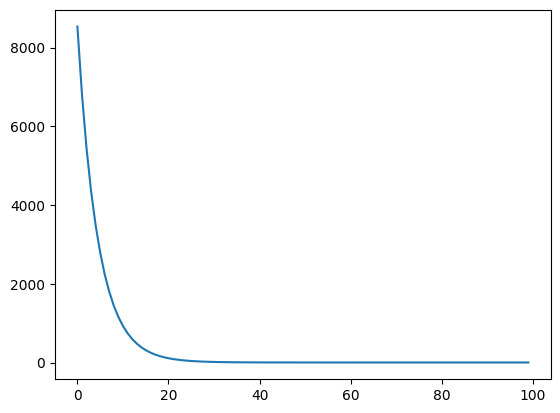

In [232]:
def train(X,y,theta,learning_rate=0.1,max_iter=100):
    n=X.shape[1]
    error_list=[]
 
    for i in range(max_iter):
        theta-=learning_rate*gradient(X,y,theta)
        error=loss(X,theta,y)
        error_list.append(error)
    plt.plot(error_list)
    plt.show()
    return theta
theta=np.zeros(n)
theta=train(XT,yT,theta)

    

In [231]:
theta

array([-3.83054527e+00, -2.12771382e-02,  6.04370381e+01,  1.06953304e+01,
        6.35756368e+01, -3.57478479e-02,  7.47476532e-02,  4.09262012e+01,
        4.12905686e-02,  6.09710182e-02,  2.53393039e+01])

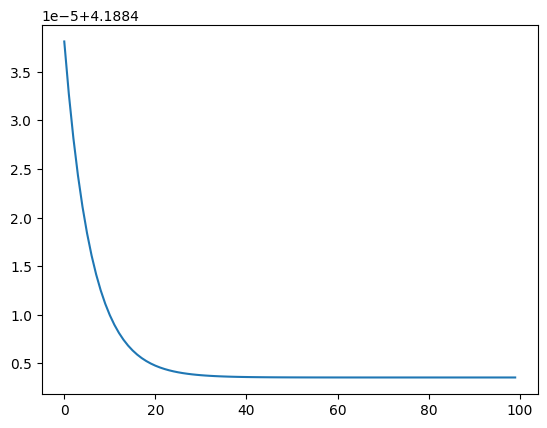

array([-3.83096575e+00, -2.06171228e-02,  6.04374520e+01,  1.06974358e+01,
        6.35793322e+01, -3.74338295e-02,  7.24967180e-02,  4.09293825e+01,
        4.23423688e-02,  5.84289235e-02,  2.53368197e+01])

In [233]:
train(XT,yT,theta)

In [236]:
def r2score(X,y,theta):
    yp=hypothesis(X,theta)
    ymean=np.mean(y)
    num=np.sum((yp-y)**2)
    den=np.sum((ymean-y)**2)
    return 1-(num/den)
r2score(X,y,theta)


0.9995967338043984

In [239]:
hypothesis(X,theta)


array([ 1.12268686e+02,  8.07941429e+01, -4.21489104e+01,  2.10183988e+01,
        3.99862485e+01,  7.79887938e+01,  3.86119049e+00, -5.60093932e+01,
       -2.29505847e+02,  2.39280319e+02, -1.47125559e+02, -1.86511107e+02,
        2.98229943e+01,  7.30744328e+01,  5.56335662e+00, -1.95488343e+02,
       -1.89410431e+02,  8.91722846e+01, -3.10698850e+01, -1.95155708e+02,
       -9.93970234e+01, -1.31285467e+02, -7.27147159e+01,  1.35737463e+02,
       -8.24430254e+01,  8.14860953e+01, -3.70596810e+01, -7.82263703e+01,
       -3.58534218e+00,  2.56283226e+02, -9.26760444e+01,  1.35496864e+02,
        6.32057779e+01, -1.40972827e+02, -5.62694084e+01, -9.32039820e+01,
       -1.00105577e+02,  9.06683102e+01,  2.06719725e+02, -5.73363533e+01,
       -3.46121138e+01,  1.40471554e+02, -4.49162773e+01,  4.49959888e+01,
       -9.91695711e+00, -2.01549595e+02,  1.69589702e+02,  2.17445291e+01,
       -1.15521454e+02,  2.89129290e+01, -1.28813753e+02,  1.99063905e+01,
        1.35825923e+02, -

In [240]:
theta


array([-3.83096575e+00, -2.06171228e-02,  6.04374520e+01,  1.06974358e+01,
        6.35793322e+01, -3.74338295e-02,  7.24967180e-02,  4.09293825e+01,
        4.23423688e-02,  5.84289235e-02,  2.53368197e+01])